<a href="https://colab.research.google.com/github/preethishas2022/Qiskit_exercise-12/blob/main/Qiskit_grover_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Base Code**

In [1]:
!pip install qiskit qiskit-aer matplotlib -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 118.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 113.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.3 MB/s eta 0:00:00


In [2]:
!pip install qiskit qiskit-aer

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import circuit_drawer
import matplotlib.pyplot as plt
import numpy as np

# ✅ Guaranteed working histogram (never blank)
def plot_counts(counts, title="Histogram"):
    labels = sorted(counts.keys())
    values = [counts[k] for k in labels]

    plt.figure(figsize=(6,4))
    plt.bar(range(len(labels)), values)
    plt.xticks(range(len(labels)), labels)
    plt.xlabel("Measured Output")
    plt.ylabel("Counts")
    plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.show()

In [3]:
def oracle(qc, n, marked_state):
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)

    qc.h(n-1)
    qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)

    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)


def diffuser(qc, n):
    qc.h(range(n))
    qc.x(range(n))

    qc.h(n-1)
    qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)

    qc.x(range(n))
    qc.h(range(n))

In [4]:
def run(qc, shots=1024, title="Result"):
    sim = AerSimulator()
    tqc = transpile(qc, sim)
    result = sim.run(tqc, shots=shots).result()
    counts = result.get_counts()
    plot_counts(counts, title)
    print("Counts:", counts)

     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 


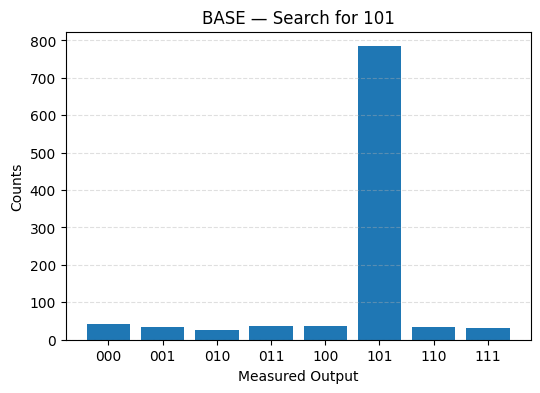

Counts: {'011': 36, '111': 31, '001': 33, '000': 43, '010': 26, '110': 34, '100': 37, '101': 784}


In [5]:
def grover_3qubit(marked_state="101"):
    n = len(marked_state)
    qc = QuantumCircuit(n, n)

    qc.h(range(n))  # initialization
    oracle(qc, n, marked_state)
    diffuser(qc, n)
    qc.measure(range(n), range(n))
    return qc

qc = grover_3qubit("101")
print(qc.draw())
run(qc, title="BASE — Search for 101")

# **Task 1 : Change the marked state**


Searching for: 111


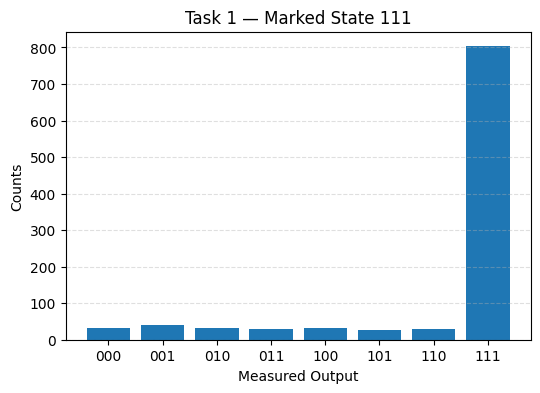

Counts: {'110': 28, '100': 31, '001': 39, '010': 33, '000': 33, '101': 27, '011': 30, '111': 803}

Searching for: 010


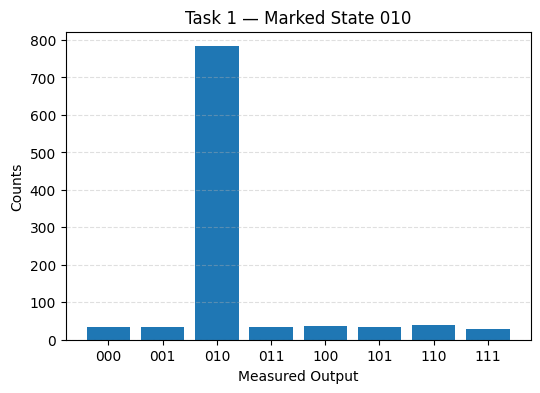

Counts: {'100': 37, '110': 38, '111': 28, '011': 35, '001': 35, '101': 33, '000': 35, '010': 783}


In [6]:
for state in ["111", "010"]:
    print("\nSearching for:", state)
    qc = grover_3qubit(state)
    run(qc, title=f"Task 1 — Marked State {state}")

# **Task 2: Modify the number of qubits**

     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐         
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├─────────
     ├───┤       │  ├───┤├───┤            │  ├───┤├───┤     └╥┘┌─┐      
q_1: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├──────╫─┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤      ║ └╥┘┌─┐   
q_2: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫──╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║  ║ └╥┘┌─┐
q_3: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║  ║ └╥┘
c: 4/════════════════════════════════════════════════════════╩══╩══╩══╩═
                                                             0  1  2  3 


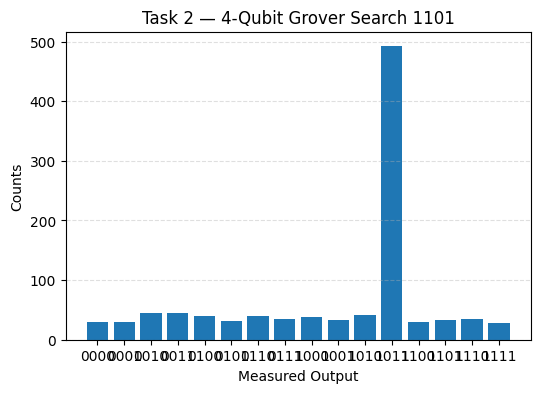

Counts: {'0001': 30, '1110': 35, '1100': 29, '1011': 492, '0011': 45, '0111': 34, '0100': 40, '1101': 33, '1111': 28, '0110': 40, '1000': 38, '0101': 31, '1001': 33, '1010': 42, '0010': 45, '0000': 29}


In [7]:
def grover_4qubit(marked_state="1101"):
    n = len(marked_state)
    qc = QuantumCircuit(n, n)

    qc.h(range(n))
    oracle(qc, n, marked_state)
    diffuser(qc, n)
    qc.measure(range(n), range(n))
    return qc

qc = grover_4qubit("1101")
print(qc.draw())
run(qc, title="Task 2 — 4-Qubit Grover Search 1101")

# **Task 3: Add multiple iterations**

     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐               ┌───┐»
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├────────────■──┤ H ├»
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤┌───┐       │  ├───┤»
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├»
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤»
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├»
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘»
c: 3/══════════════════════════════════════════════════════════════════════»
                                                                           »
«     ┌───┐               ┌───┐┌───┐               ┌───┐┌───┐               »
«q_0: ┤ X ├────────────■──┤ X ├┤ H ├────────────■──┤ H ├┤ X ├────────────■──»
«     ├───┤┌───┐       │  ├───┤├───┤┌───┐       │  ├───┤├───┤┌───┐       │  »
«q_1: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├───────

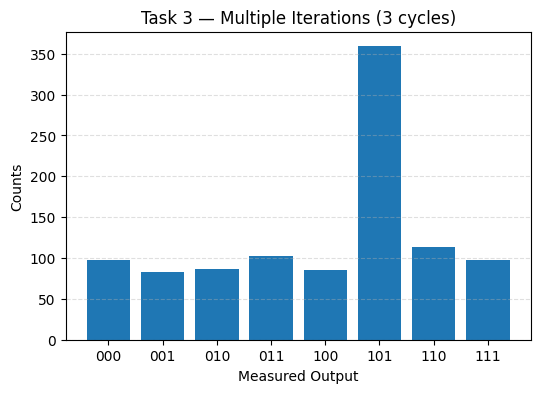

Counts: {'110': 113, '001': 83, '100': 85, '111': 98, '011': 103, '000': 97, '010': 86, '101': 359}


In [8]:
def grover_iterations(marked_state="101", iterations=2):
    n = len(marked_state)
    qc = QuantumCircuit(n, n)

    qc.h(range(n))

    for _ in range(iterations):
        oracle(qc, n, marked_state)
        diffuser(qc, n)

    qc.measure(range(n), range(n))
    return qc

qc = grover_iterations("101", iterations=3)
print(qc.draw())
run(qc, title="Task 3 — Multiple Iterations (3 cycles)")

# **Task 4: Circuit Visualization**

In [9]:
%matplotlib inline

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, circuit_drawer
import matplotlib.pyplot as plt

def oracle(qc, n, marked_state):
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)

def diffuser(qc, n):
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    qc.x(range(n))
    qc.h(range(n))

def grover_search(marked_state):
    n = len(marked_state)
    qc = QuantumCircuit(n, n)
    qc.h(range(n))
    oracle(qc, n, marked_state)
    diffuser(qc, n)
    qc.measure(range(n), range(n))
    return qc

# --- Run Grover ---
marked_state = "101"
qc = grover_search(marked_state)

# ✅ Draw using SAFE universal drawer (NO LaTeX, NO errors)
print(circuit_drawer(qc, output="text"))

# --- Simulate ---
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=2048).result()

counts = result.get_counts()
print("\nCounts =", counts)

plot_histogram(counts)
plt.show()

     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 

Counts = {'011': 49, '111': 69, '001': 64, '100': 74, '010': 63, '000': 58, '101': 1603, '110': 68}


# **Task 5: Experiment with Noise**

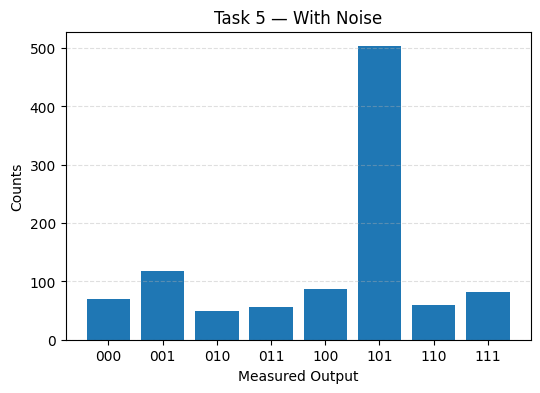

Counts: {'011': 56, '111': 82, '100': 87, '010': 50, '000': 69, '101': 503, '001': 118, '110': 59}


In [10]:
from qiskit_aer.noise import NoiseModel, depolarizing_error

def run_with_noise(qc):
    noise = NoiseModel()
    noise.add_all_qubit_quantum_error(depolarizing_error(0.05, 1), ['h','x'])
    noise.add_all_qubit_quantum_error(depolarizing_error(0.10, 2), ['mcx'])

    sim = AerSimulator(noise_model=noise)
    tqc = transpile(qc, sim)

    result = sim.run(tqc, shots=1024).result()
    counts = result.get_counts()

    plot_counts(counts, "Task 5 — With Noise")
    print("Counts:", counts)

qc = grover_3qubit("101")
run_with_noise(qc)

# **Task 6: Real Hardware Execution (Optional)**

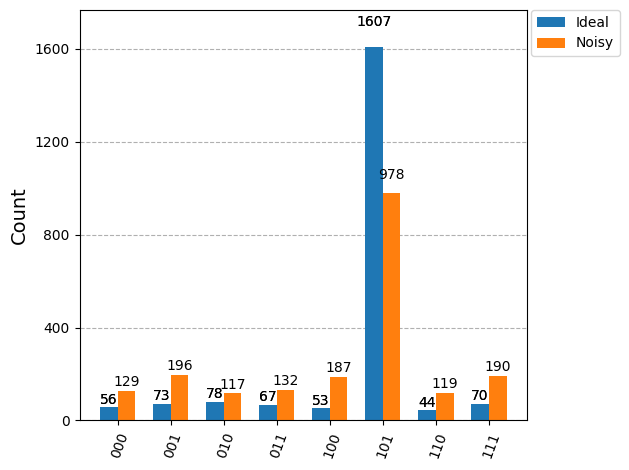

In [11]:
from qiskit import transpile
from qiskit_aer import Aer, AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import NoiseModel, depolarizing_error

sim_ideal = Aer.get_backend('qasm_simulator')

# Ideal run (no noise)
tqc_ideal = transpile(qc, sim_ideal)
result_ideal = sim_ideal.run(tqc_ideal, shots=2048).result()
counts_ideal = result_ideal.get_counts()

# Noisy run
noise = NoiseModel()
noise.add_all_qubit_quantum_error(depolarizing_error(0.05, 1), ['h','x'])
noise.add_all_qubit_quantum_error(depolarizing_error(0.10, 2), ['mcx'])

sim_noisy = AerSimulator(noise_model=noise)
tqc_noisy = transpile(qc, sim_noisy)
result_noisy = sim_noisy.run(tqc_noisy, shots=2048).result() # Using 2048 for consistency with ideal run
counts_noisy = result_noisy.get_counts()

# Compare
plot_histogram([counts_ideal, counts_noisy], legend=['Ideal', 'Noisy'])